In [1]:
import pandas as pd 

df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')

print(df.target_names.unique())
df.head()

['rec.autos' 'comp.sys.mac.hardware' 'comp.graphics' 'sci.space'
 'talk.politics.guns' 'sci.med' 'comp.sys.ibm.pc.hardware'
 'comp.os.ms-windows.misc' 'rec.motorcycles' 'talk.religion.misc'
 'misc.forsale' 'alt.atheism' 'sci.electronics' 'comp.windows.x'
 'rec.sport.hockey' 'rec.sport.baseball' 'soc.religion.christian'
 'talk.politics.mideast' 'talk.politics.misc' 'sci.crypt']


,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


<Axes: xlabel='target_names'>

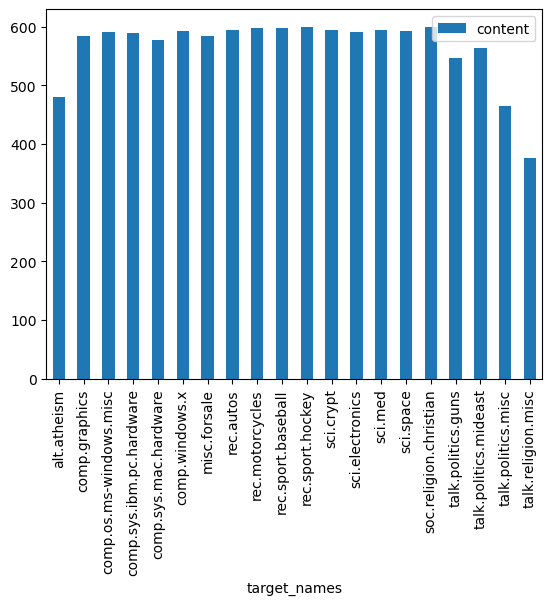

In [2]:
df[["target_names", "content"]].groupby(['target_names']).count().plot(kind='bar')


## Preprocessing

In [3]:
import gensim 
data = list(df['content'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['from', 'lerxst', 'wam', 'umd', 'edu', 'where', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']]

### Creating bigram and trigram for model

In [4]:
# Build the bigram and trigram models 

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data_words[0]]])


['from', 'lerxst', 'wam_umd_edu', 'where', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp_posting_host', 'rac_wam_umd', 'edu', 'organization', 'university', 'of', 'maryland_college_park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front_bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']


In [5]:
type(bigram)
print(bigram)

Phrases<1032647 vocab, min_count=5, threshold=100, max_vocab_size=40000000>


In [7]:
import nltk

nltk.download('stopwords')

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', "ADJ", "VERB", "ADV"]):

    texts_out = []

    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [14]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---- ----------------------------------- 1.3/12.8 MB 5.1 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.8 MB 4.0 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.8 MB 3.4 MB/s eta 0:00:04
     ---------- ----------------------------- 3.4/12.8 MB 3.9 MB/s eta 0:00:03
     ------------- -------------------------- 4.2/12.8 MB 3.8 MB/s eta 0:00:03
     -------------- ------------------------- 4.7/12.8 MB 3.7 MB/s eta 0:00:03
     ---------------- ----------------------- 5.2/12.8 MB 3.5 MB/s eta 0:00:03
     ------------------- -------------------- 6.3/12.8 MB 3.6 MB/s eta 0:00:02
     --------------------- ------------------ 6.8/12.8 MB 3.5 MB/s eta 0:00:02
     ----------------------- ---------------- 7.6/12.8 MB 3.6 MB/s eta 0:00:02
     -------------------------- ------------- 8.4/12.8 MB 3.6 MB/s

In [15]:
from gensim.utils import simple_preprocess
import spacy 

from nltk.corpus import stopwords 

stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


data_words_nostops = remove_stopwords(data_words)

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB','ADV'])

print(data_lemmatized[:1])

[['thing', 'car', 'nntp_poste', 'host', 'park', 'line', 'wonder', 'enlighten', 'car', 'see', 'day', 'door', 'sport', 'car', 'look', 'late', 'early', 'call', 'bricklin', 'door', 'really', 'small', 'addition', 'separate', 'rest', 'body', 'know', 'model', 'name', 'engine', 'spec', 'year', 'production', 'car', 'make', 'history', 'info', 'funky', 'look', 'car', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst']]


In [17]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_lemmatized)

texts = data_lemmatized

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 5), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)]]


## Building LDA model

In [18]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=True)

In [19]:
! mkdir models 

lda_model.save("./models/model_lda_100.model")


## Topics after training

In [20]:
from pprint import pprint 

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.027*"attack" + 0.025*"kill" + 0.021*"war" + 0.020*"israeli" + '
  '0.020*"soldier" + 0.017*"village" + 0.016*"greek" + 0.014*"people" + '
  '0.014*"armenian" + 0.013*"turk"'),
 (1,
  '0.108*"color" + 0.073*"monitor" + 0.068*"picture" + 0.051*"signal" + '
  '0.033*"battery" + 0.025*"reliable" + 0.021*"up" + 0.021*"ray" + '
  '0.016*"pasadena" + 0.014*"gentile"'),
 (2,
  '0.180*"file" + 0.083*"entry" + 0.064*"video" + 0.046*"brain" + '
  '0.043*"format" + 0.040*"family" + 0.029*"manager" + 0.027*"convert" + '
  '0.016*"configuration" + 0.015*"capture"'),
 (3,
  '0.060*"publish" + 0.044*"health" + 0.039*"insurance" + 0.035*"male" + '
  '0.035*"cycle" + 0.030*"ticket" + 0.029*"water" + 0.024*"nuclear" + '
  '0.022*"relation" + 0.020*"canadian"'),
 (4,
  '0.035*"state" + 0.028*"law" + 0.027*"right" + 0.026*"gun" + '
  '0.023*"government" + 0.016*"public" + 0.012*"case" + 0.011*"protect" + '
  '0.010*"country" + 0.009*"reality"'),
 (5,
  '0.033*"go" + 0.025*"get" + 0.021*"year" + 0

## Perplexity metric and Coherence score of the models

In [21]:
from gensim.models.coherencemodel import CoherenceModel

print('\nPerplexity: ', lda_model.log_perplexity(corpus))

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print("\nCoherence Score: ", coherence_lda)


Perplexity:  -13.599933004143242

Coherence Score:  0.4701919838506477


In [22]:
import pyLDAvis 
import pyLDAvis.gensim
import matplotlib.pyplot as plt 
%matplotlib inline

# Visualize the topics
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.346767 -0.089954       1        1  20.558600
5      0.326835 -0.055221       2        1  18.887608
18     0.308273  0.092961       3        1  17.161526
11     0.234558  0.136271       4        1   9.584426
14     0.217289  0.235642       5        1   8.933922
4      0.135833 -0.240623       6        1   5.433980
16    -0.065175  0.027756       7        1   4.450337
10     0.027314  0.059081       8        1   2.920696
0      0.059312 -0.280410       9        1   2.850225
6      0.003437  0.012471      10        1   2.486033
12    -0.112245  0.049195      11        1   1.227510
17    -0.098519  0.049049      12        1   1.124869
8     -0.090654 -0.020155      13        1   1.070528
2     -0.149867  0.017439      14        1   0.930566
9     -0.156757 -0.017164      15        1   0.741890
3     -0.185300  0.012351      16        1   0.472585
19    -0.184454 -0.004430      17        1   0.448844
1     -0.186382  0.006744      18        1   0.446348
13    -0.217128  0.004234      19        1   0.143984
15    -0.213136  0.004763      20        1   0.125521, topic_info=               Term          Freq         Total Category  logprob  loglift
4479             ax  40724.000000  40724.000000  Default  30.0000  30.0000
183             com  15767.000000  15767.000000  Default  29.0000  29.0000
18             line  16276.000000  16276.000000  Default  28.0000  28.0000
203           write  13716.000000  13716.000000  Default  27.0000  27.0000
303    organization  10054.000000  10054.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
26259  laserprinter      0.021631      1.292565  Topic20 -11.2276   2.5902
4326          laser      0.021631      1.292581  Topic20 -11.2276   2.5902
4260           inch      0.021631      1.292592  Topic20 -11.2276   2.5902
7836        immoral      0.021631      1.292580  Topic20 -11.2276   2.5902
5629     definition      0.021631      1.292603  Topic20 -11.2276   2.5902

[880 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3366     13  0.970441  abstract
363      19  0.922029    absurd
1393      9  0.259533    accept
1393     15  0.739175    accept
86        5  0.972131    access
...     ...       ...       ...
38        9  0.004380      year
38       10  0.015427      year
1151     16  0.967293    yellow
637       1  0.012095     young
637       2  0.986919     young

[1244 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 19, 12, 15, 5, 17, 11, 1, 7, 13, 18, 9, 3, 10, 4, 20, 2, 14, 16])

In [25]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    rows = []
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
         
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                rows.append([int(topic_num), round(prop_topic, 4), topic_keywords])
            else:
                break
    sent_topics_df = pd.DataFrame(rows, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)

    return (sent_topics_df)

    
                
                

In [26]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)


df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ["Document_No", "Dominant_Topic", "Topic_Perc_Contrib", "Keywords", "Text"]

df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5,0.2433,"go, get, year, time, good, well, see, take, co...",From: lerxst@wam.umd.edu (where's my thing)\nS...
1,1,10,0.2296,"book, word, receive, cover, copy, office, page...",From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,2,18,0.3112,"line, com, write, organization, article, nntp_...",From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,3,18,0.3073,"line, com, write, organization, article, nntp_...",From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,4,18,0.4264,"line, com, write, organization, article, nntp_...",From: jcm@head-cfa.harvard.edu (Jonathan McDow...
5,5,4,0.3922,"state, law, right, gun, government, public, ca...",From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...
6,6,18,0.2858,"line, com, write, organization, article, nntp_...",From: bmdelane@quads.uchicago.edu (brian manni...
7,7,14,0.6124,"system, drive, use, window, problem, computer,...",From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...
8,8,5,0.3943,"go, get, year, time, good, well, see, take, co...",From: holmes7000@iscsvax.uni.edu\nSubject: WIn...
9,9,14,0.3500,"system, drive, use, window, problem, computer,...",From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...
